## EDA - Assignment 1
Heart Failure Clinical Records Dataset

In [79]:
## Import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Dimensions of the dataset :',df.shape)
print(df.info())
df.head()

Dimensions of the dataset : (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
me

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [81]:
## check null values in the dataset
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The above output shows that there are no null values present in the dataset

Q1) What is the distribution of age among heart failure patients in the dataset ?


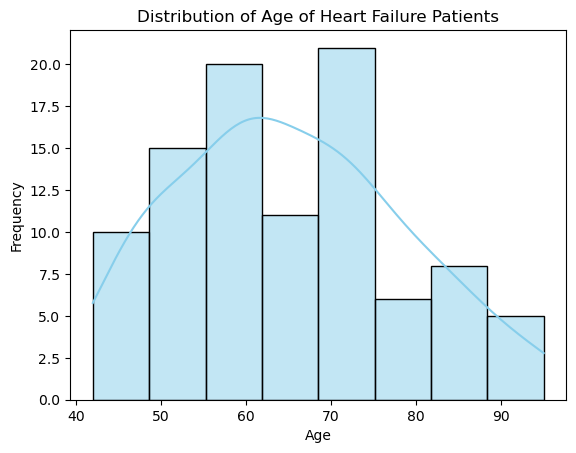

In [131]:
Heart_Failure = df[df['DEATH_EVENT']== 1].copy()

sns.histplot(Heart_Failure['age'], kde = True, color = 'skyblue')
plt.title('Distribution of Age of Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


From the above Histogram, we can conclude:
1) The Mean Age of Heart Failure Patients is ~ 65 years.
2) Most of the Heart Failure Patients lie in the Age range (40,75)
3) Maximum Heart Failures occured in the patients in the Age range (68,75)


Q2) How does the death rate vary with age ?

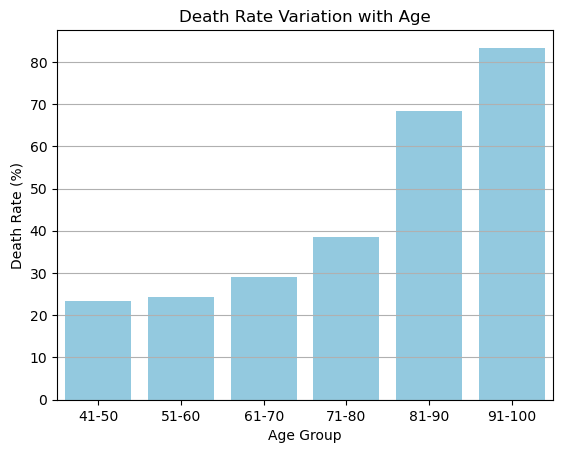

In [130]:
# Define age bins
age_bins = [40, 50, 60, 70, 80, 90, 100]
age_labels = ['41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for age bins
df['Age_Bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the death rate (as percentage) for each age bin (% of people dying in each agegroup)
death_rate_by_age_bin = df.groupby('Age_Bin')['DEATH_EVENT'].mean().reset_index()
death_rate_by_age_bin['DEATH_EVENT'] *= 100  # Convert to percentage

# Plot the death rate against age bins
sns.barplot(x='Age_Bin', y='DEATH_EVENT', data=death_rate_by_age_bin, color='skyblue')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
#plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


From the above graph, we can conclude that the death rate increases as the people grow old. This is intuitive as the person grows old, he dies (though the exact reason of death may vary).

Q3) What is the percentage of male and female patients in the dataset ?

Male Percentage : 64.88
Female Percentage : 35.12


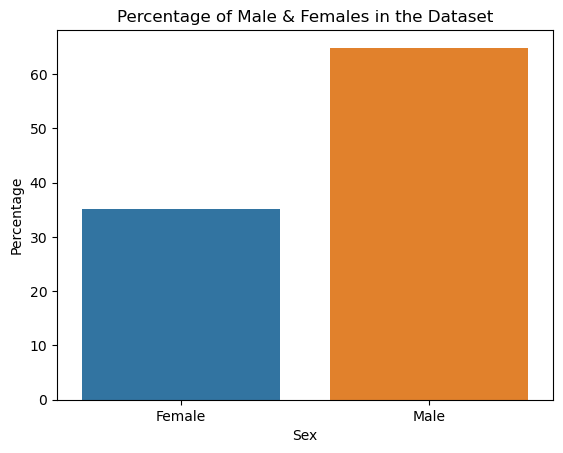

In [129]:
# Calculate total number of males and females
total_count = len(df)
male_count = (df['sex'] == 1).sum()  # Assuming 1 represents male
female_count = (df['sex'] == 0).sum()  # Assuming 0 represents female

# Calculate percentage of males and females
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print("Male Percentage :",round(male_percentage,2))
print("Female Percentage :",round(female_percentage,2))

### Another ways is to get the percentages from a barchart
### Plotting a barchart directly
sns.barplot(x='sex', y='sex', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Percentage of Male & Females in the Dataset')
# Set x-axis tick positions and labels
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.show()


From the above chart, we can conclude that there are ~65% of males in the dataset

4)  How does the platelet count vary among different age groups ?

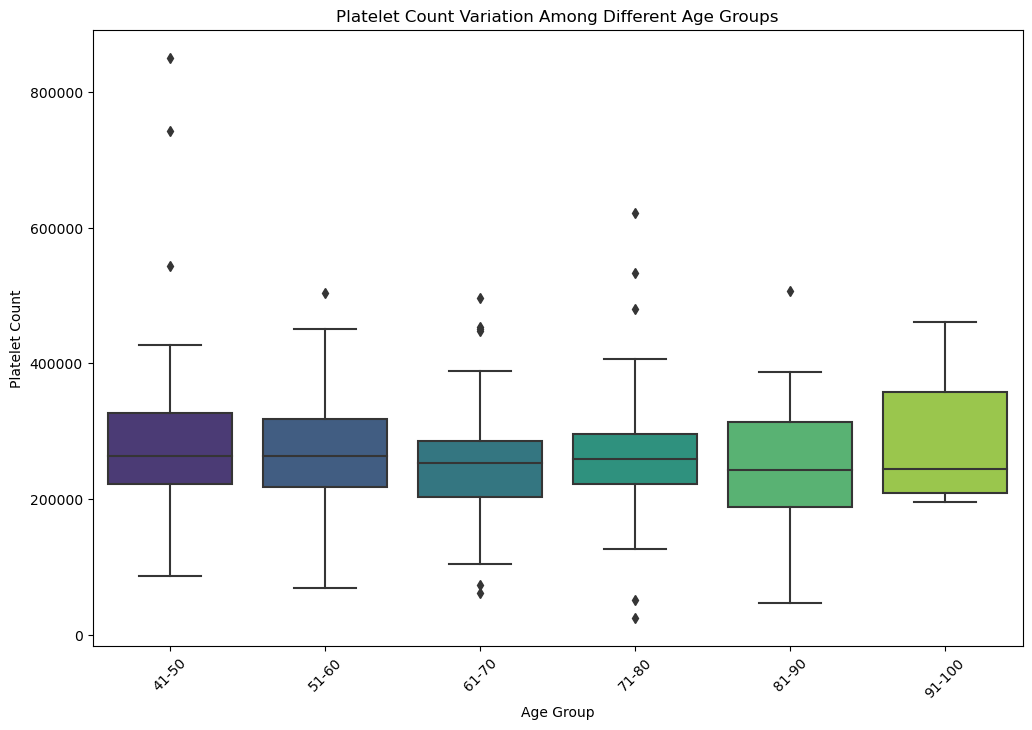

In [96]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Bin', y='platelets', data=df, palette='viridis')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.show()


Observations :
1) The platelet count varies across different age groups, as indicated by the range covered by the boxes and whiskers. Younger age groups tend to have a narrower range compared to older age groups.
2) The height of the boxes (interquartile range) and the length of the whiskers indicate the variability of platelet counts within each age group. Higher variability suggests a wider range of platelet counts within that age group. The 51-60 Agegroup has the maximum variablility in platelets
3) Outliers: There are some outliers in all age groups (except 91-100), represented by individual points outside the whiskers. These outliers may indicate unusual or extreme platelet counts within those age groups.
4) Median Platelet Count: The horizontal line inside each box represents the median platelet count for the respective age group. We can observe from the graph that the median platelet count changes across different age groups.

5)  Is there a correlation between creatinine and sodium levels in the blood ?

                  serum_creatinine  serum_sodium
serum_creatinine          1.000000     -0.189095
serum_sodium             -0.189095      1.000000


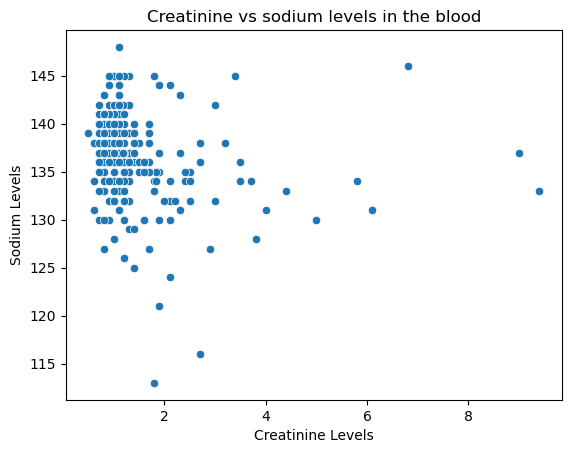

In [112]:
print(df[['serum_creatinine','serum_sodium']].corr())
sns.scatterplot(x='serum_creatinine',y='serum_sodium',data=df)
plt.title('Creatinine vs sodium levels in the blood')
plt.xlabel('Creatinine Levels')
plt.ylabel('Sodium Levels')
plt.show()

Observations:
1) The data points are somewhat scattered, indicating that the relationship is not extremely strong.
2) There appear to be a few outliers where serum creatinine levels are high to the general trend of serum sodium levels.
3) The correlation coefficient of -0.189 indicates a slight negative correlation between serum creatinine and serum sodium levels.

6) How does the prevalence of high blood pressure differ between male and female patients ?

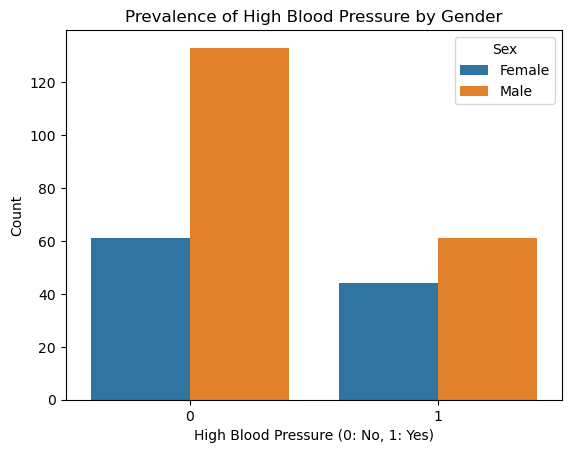

In [117]:
sns.countplot(x='high_blood_pressure', hue='sex', data=df)
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()



Observations:
1) The plot shows that a higher number of female patients have high blood pressure compared to male patients. This is evident from the higher count of '1' (indicating high blood pressure) in the female category compared to the male category.

Q7) What is the relationship between smoking habits and the occurrence of heart failure ?

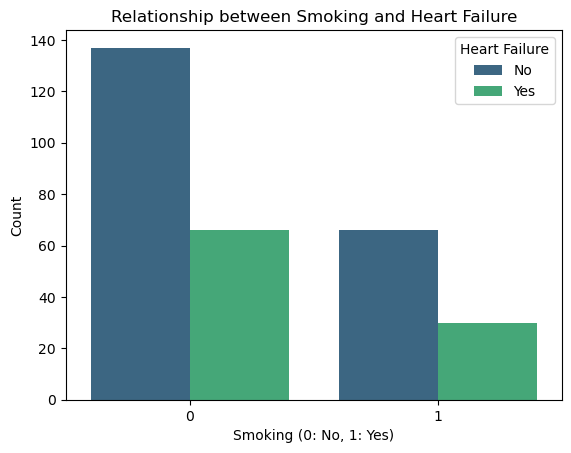

In [121]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='viridis')
plt.title('Relationship between Smoking and Heart Failure')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.show()


Observations:
1) The plot indicates that among patients who do not smoke (smoking = 0), there are both occurrences and non-occurrences of heart failure (DEATH_EVENT = 0 or 1). Similarly, among patients who smoke (smoking = 1), there are occurrences and non-occurrences of heart failure.
2) However, there appears to be a higher count of heart failure occurrences (DEATH_EVENT = 1) among non-smokers (smoking = 0) compared to smokers (smoking = 1).
3) The plot suggests that there may be a relationship between smoking habits and the occurrence of heart failure. However, further analysis, such as statistical testing, would be needed to determine the significance of this relationship.

8) Are there any noticeable patterns in the distribution of death events across different age groups ?

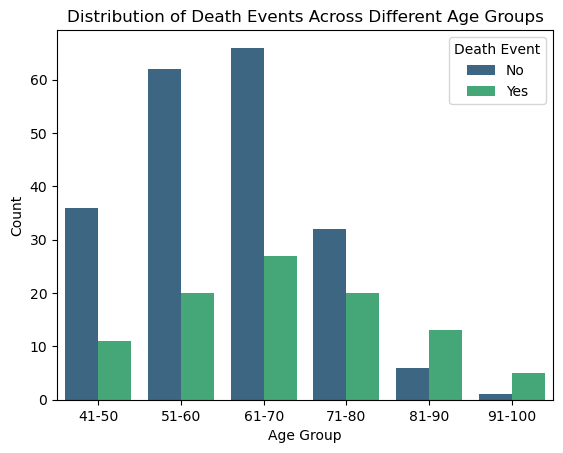

In [125]:
sns.countplot(x='Age_Bin', hue='DEATH_EVENT', data=df, palette='viridis')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['No', 'Yes'])
plt.show()


Observations:
1)  The higher frequency of death events in the older Age Groups (ie 81-90 & 91-100), indicate an association between older age and the likelihood of experiencing a death event.

9)  Is there any significant difference in ejection fraction between patients with and without diabetes ?

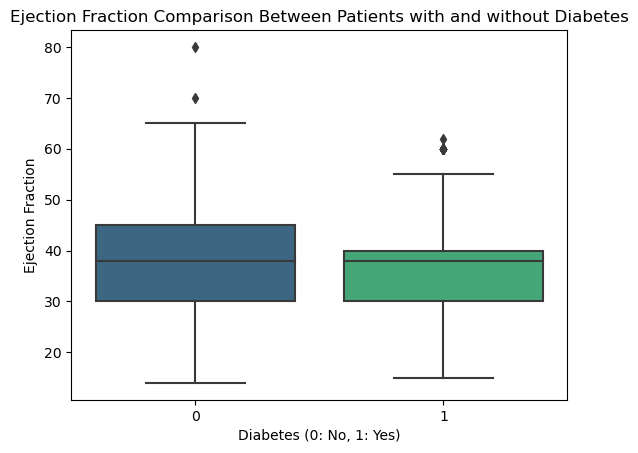

In [126]:
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette='viridis')
plt.title('Ejection Fraction Comparison Between Patients with and without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.show()


Observations:
1) The plot shows the median ejection fraction for patients with and without diabetes. The plot shows almost similar median values for both groups.
2) The height of the boxes (interquartile range) shows higher variability in the Non Diabetic group.
3) The plot shows few outliers for both the Diabetic and Non Diabetic groups.

10) How does the serum creatinine level vary between patients who survived and those who did not ?

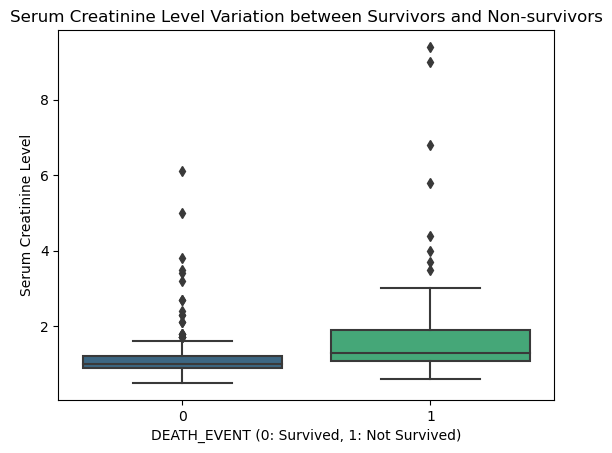

In [128]:
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='viridis')
plt.title('Serum Creatinine Level Variation between Survivors and Non-survivors')
plt.xlabel('DEATH_EVENT (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()


Observations:
1) The plot shows the median serum creatinine level for patients who did not survived is higher than those who did not.
2) The height of the boxes (interquartile range) shows the variability of serum creatinine levels is higher for Non Survival group.
3) The plot shows outliers for both groups.
4) From the boxplot,the appears to be a visual difference between the two groups. 